# **Exploratory Data Analysis (EDA) for Credit Risk Probability Model - Xente Data**

This notebook serves as the core of our Exploratory Data Analysis (EDA) phase for the Credit Risk Probability Model, specifically utilizing the Xente Challenge dataset. Its primary goal is to develop a foundational understanding of the eCommerce transaction data, assess its quality, and uncover initial patterns that will inform our feature engineering and model development.

We will leverage a modular set of Python scripts (`src/eda/`) for data loading, preprocessing, summarization, and various analytical techniques (univariate, bivariate, multivariate, missing value, outlier, and temporal analysis). This modular approach promotes clean code, reusability, and reproducibility, aligning with best practices in Data Engineering and Machine Learning Engineering.

## **Table of Contents**

1. [Setup and Data Loading](#1-setup-and-data-loading)
2. [Data Understanding and Initial Quality Check](#2-data-understanding-and-initial-quality-check)
3. [Missing Values Analysis](#3-missing-values-analysis)
4. [Univariate Analysis](#4-univariate-analysis)
5. [Bivariate Analysis](#5-bivariate-analysis)
6. [Multivariate Analysis](#6-multivariate-analysis)
7. [Outlier Detection](#7-outlier-detection)
8. [Temporal Trend Analysis](#8-temporal-trend-analysis)
9. [Key Insights & Summary](#9-key-insights--summary)

## **1. Setup and Data Loading**

This section establishes our analytical environment by importing essential Python libraries for data manipulation, visualization, and numerical operations. Crucially, we also import our custom modular functions and classes from the `src/eda/` directory. This ensures that data loading, preprocessing, and various analytical steps are handled by dedicated, reusable components.

**Note on Data:** This notebook expects the `data.csv` file from the [Xente Challenge Kaggle dataset](https://www.kaggle.com/datasets/atwine/xente-challenge) to be placed in the `data/raw/` directory of your project. Please ensure the file is downloaded and correctly placed before running this notebook.

### Import Necessary Libraries and Custom Modules

In [22]:
# Core Libraries for Data Manipulation and Numerical Operations
import pandas as pd
import numpy as np
from pathlib import Path
import os # For path operations

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root directory to the system path.
# This allows Python to correctly locate and import our custom modules
# (e.g., from `src.data_loader`) regardless of where the notebook is run from.
import sys
project_root = Path.cwd() # Navigates from 'notebooks/' directory to the project root
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import Custom Modular Functions and Classes from `src/utils/`
# Data Loading and Preprocessing Utilities
from src.data_loader import load_data
from src.data_processing import preprocess_data

# Data Summarization Utilities
from src.eda.data_summarization import calculate_loss_ratio, get_overall_loss_ratio

# Data Inspection Utilities (includes strategies for dtypes and summary statistics)
from src.eda.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy

# Univariate Analysis Utilities
from src.eda.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis

# Bivariate Analysis Utilities
from src.eda.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis, CategoricalVsCategoricalAnalysis

# Multivariate Analysis Utilities
from src.eda.multivariate_analysis import SimpleMultivariateAnalysis # Implements MultivariateAnalysisTemplate

# Missing Values Analysis Utilities
from src.eda.missing_values_analysis import SimpleMissingValuesAnalysis # Implements MissingValuesAnalysisTemplate

# Outlier Analysis Utilities
from src.eda.outlier_analysis import OutlierAnalyzer, IQRBasedOutlierAnalysis

# Temporal Analysis Utilities
from src.eda.temporal_analysis import TemporalAnalyzer, MonthlyTrendAnalysis


#### Set Plotting Style

In [23]:
# Configure Matplotlib and Seaborn for consistent and aesthetic plots
sns.set_style("whitegrid") # Provides a clean, modern look with a grid
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size for plots
plt.rcParams['font.size'] = 12 # Base font size for readability
plt.rcParams['axes.labelsize'] = 14 # Font size for axis labels
plt.rcParams['xtick.labelsize'] = 12 # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12 # Font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 12 # Font size for plot legends
plt.rcParams['font.family'] = 'sans-serif' # Use a default sans-serif font

### Loading the Xente Transaction Data
loads the data.csv file, which contains the eCommerce transaction data from the Xente Challenge Kaggle dataset. It also notes the expectation that this file is placed in the data/raw/ directory.

In [24]:
# Define the path to the raw Kaggle data file
raw_data_file_path = project_root / "data" / "raw" / "data.csv"

print("\n--- Attempting to Load Xente Transaction Data ---")

# Load the data using our data_loader module
df_raw = load_data(raw_data_file_path) # Xente data is CSV, usually comma-delimited

if df_raw.empty:
    print("Error: DataFrame is empty. Please ensure 'data.csv' is in 'data/raw/' and is not empty.")
else:
    print("Data loaded successfully. Displaying first 5 rows and basic info:")
    display(df_raw.head())
    df_raw.info()

# Convert 'Amount' and 'Value' to numeric, coercing errors to NaN
# Preprocess the data using the dedicated data_processing script
df = preprocess_data(df_raw)

# Define column types based on Xente Data Fields for consistent analysis
numerical_cols = ['Amount', 'Value']
categorical_cols = [
    'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory',
    'ChannelId', 'PricingStrategy', 'FraudResult'
]
# Identifiers, often treated separately or as categorical for specific counts:
identifier_cols = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProductId']

print("\nInitial data type conversions applied for numerical and datetime columns.")



--- Attempting to Load Xente Transaction Data ---


Successfully loaded data from /home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/data/raw/data.csv
Data loaded successfully. Displaying first 5 rows and basic info:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

**Analysis of Output:**

- The output confirms that `data.csv` was successfully loaded, showing the first 5 rows and a `df.info()` summary.
- The DataFrame contains 95,662 entries and 16 columns.
- Columns like `TransactionId`, `BatchId`, `AccountId`, `SubscriptionId`, `CustomerId`, `CurrencyCode`, `ProviderId`, `ProductId`, `ProductCategory`, and `ChannelId` are `object` (string) type.
- `CountryCode`, `Amount`, `Value`, `PricingStrategy`, and `FraudResult` are numerical (`int64` or `float64`).
- `TransactionStartTime` is initially `object` but is converted to `datetime64[ns, UTC]` during preprocessing, which is crucial for temporal analysis.
- The memory usage is approximately 11.7 MB, indicating a manageable dataset size.

**Key Insights:**

- **Data Loaded Successfully:** The initial data loading and preprocessing steps are confirmed to be working, providing a clean DataFrame `df` for further analysis.
- **Data Types:** Most columns are correctly inferred, but `TransactionStartTime`'s conversion to datetime is vital for time-series analysis. The `Amount` and `Value` columns are correctly identified as numerical.
- **Identifier Columns:** Several columns (`TransactionId`, `BatchId`, `AccountId`, `SubscriptionId`, `CustomerId`, `ProductId`) are unique identifiers. While they are `object` type, their high cardinality suggests they are not directly useful for numerical operations but are critical for grouping or linking data. They should be treated as categorical for counting unique entities.

## **2. Data Understanding and Initial Quality Check**

This section provides an initial overview of the dataset's structure, including data types and non-null counts, and then presents summary statistics for numerical features. This helps in quickly grasping the scale, distribution, and potential issues within the data.

### Data Structure and Quality Assessment (using `DataTypesInspectionStrategy`)
This step uses the `DataTypesInspectionStrategy` to get a concise summary of column data types and the count of non-null values. This is crucial for identifying columns with missing data and understanding the inferred types by pandas.

In [25]:
if not df.empty:
    inspector = DataInspector(DataTypesInspectionStrategy())
    inspector.execute_inspection(df)
else:
    print("DataFrame is empty, skipping Data Structure and Quality Assessment.")


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-nu

**Analysis of Output:**

- The `df.info()` output confirms that all 95,662 entries across all 16 columns are non-null. This is a significant finding, indicating no missing values in the dataset after initial loading and preprocessing.
- `TransactionStartTime` is confirmed as `datetime64[ns, UTC]`, `Amount` as `float64`, and `Value`, `CountryCode`, `PricingStrategy`, `FraudResult` as `int64`. Other columns remain `object` type.

**Key Insights:**

- **No Missing Values:** A critical finding is the absence of missing values in the dataset. This simplifies the preprocessing pipeline as no imputation strategies are immediately required.
- **Corrected Data Types:** The `TransactionStartTime` column has been successfully converted to a datetime object, which is essential for any temporal analysis. Numerical columns are correctly typed.

### Descriptive Statistics & Variability (using `SummaryStatisticsInspectionStrategy`)
The `SummaryStatisticsInspectionStrategy` provides a quick statistical summary of numerical columns, including count, mean, standard deviation, min, max, and quartiles. For categorical columns, it shows unique counts and top values.

In [26]:
if not df.empty:
    inspector.set_strategy(SummaryStatisticsInspectionStrategy())
    inspector.execute_inspection(df)
else:
    print("DataFrame is empty, skipping Descriptive Statistics.")


Summary Statistics for Numerical Features:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Value Counts for Categorical Features (Top 10 for each):


--- TransactionId ---
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64


--- BatchId ---
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_110084     7
BatchId_49408      7
BatchId_4233       6
BatchId_66085      6
Name: count, dtype: int64


--- AccountId ---
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64


--- SubscriptionId ---
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372   

**Analysis of Output:**

**Numerical Features:**

- **`CountryCode`**: All values are 256, indicating a single country of operation (Uganda, based on Xente context). This column has no variance and provides no discriminatory power.
- **`Amount`**:
    - Mean: 6717.85 UGX
    - Min: -1,000,000 UGX
    - Max: 9,880,000 UGX
    - The minimum value being negative is highly unusual for a transaction amount and suggests data entry errors or specific transaction types (e.g., refunds, chargebacks) that need investigation.
    - The large standard deviation (123,306.8) and significant difference between the mean and max suggest a highly skewed distribution with extreme outliers.
- **`Value`**:
    - Mean: 9900.58 UGX
    - Min: 2 UGX
    - Max: 9,880,000 UGX
    - Similar to `Amount`, `Value` also shows a wide range and potential outliers, although it doesn't have negative values.
- **`PricingStrategy`**:
    - Mean: 2.26
    - Min: 0, Max: 4
    - This is likely a categorical feature despite being `int64`, representing different pricing models.
- **`FraudResult`**:
    - Mean: 0.002018
    - Min: 0, Max: 1
    - This indicates that only about 0.2% of transactions are fraudulent (95662 * 0.002018 ≈ 193 fraud cases). This is a highly imbalanced dataset, which is common in fraud detection and credit risk.

**Categorical Features (Top 10 Value Counts):**

- **`TransactionId`, `BatchId`, `AccountId`, `SubscriptionId`, `CustomerId`, `ProductId`**: These are primarily unique identifiers. `AccountId` and `SubscriptionId` show some accounts/subscriptions with a very high number of transactions (e.g., `AccountId_4841` with 30,893 transactions), indicating frequent users or high-volume entities. `TransactionId` is unique per row.
- **`CurrencyCode`**: Only 'UGX' (Ugandan Shilling) is present, confirming a single currency.
- **`ProviderId`**: `ProviderId_4` (38189) and `ProviderId_6` (34186) are the most frequent providers, with `ProviderId_2` being extremely rare (18 occurrences).
- **`ProductCategory`**: 'financial_services' (45405) and 'airtime' (45027) dominate, followed by 'utility_bill' and 'data_bundles'. 'transport' and 'other' are very rare.
- **`ChannelId`**: `ChannelId_3` (56935) and `ChannelId_2` (37141) are the most common channels, with `ChannelId_5` and `ChannelId_1` being less frequent.

**Key Insights & Recommendations:**

- **High Imbalance in `FraudResult`:** The target variable `FraudResult` is severely imbalanced. This needs to be addressed during model training (e.g., using techniques like SMOTE, class weights, or appropriate evaluation metrics like precision, recall, F1-score, AUC-ROC).
- **Negative `Amount` Values:** The presence of negative `Amount` values is a data quality issue that needs to be investigated. These could be refunds, chargebacks, or data errors. For a credit risk model, understanding these is crucial. A decision needs to be made on how to handle them (e.g., convert to absolute value if they represent transaction magnitude, or treat them as a separate category/feature if they signify a specific type of transaction).
- **Outliers in `Amount` and `Value`:** The wide range and large standard deviation of `Amount` and `Value` suggest significant outliers. These should be further investigated and potentially handled (e.g., capping, transformation) to prevent them from disproportionately influencing the model.
- **Dominant Categories:** Many categorical features have highly dominant categories (e.g., `CurrencyCode`, `CountryCode`, top `ProviderId`, `ProductCategory`, `ChannelId`). This indicates that these features might have limited discriminatory power if not handled carefully, but the less frequent categories might hold important signals for fraud.
- **`PricingStrategy` as Categorical:** Confirm `PricingStrategy` should be treated as a categorical feature, not numerical, for appropriate analysis and encoding.
- **High Cardinality Identifiers:** `AccountId`, `SubscriptionId`, `CustomerId` are high-cardinality categorical features. While useful for grouping, direct one-hot encoding might lead to too many features. Feature engineering based on these (e.g., transaction counts per customer/account, average amount per customer) will be more effective.

## **3. Missing Values Analysis**

Missing data can significantly impact model performance and lead to biased results. This section identifies the extent of missing values and visualizes their patterns, guiding imputation or removal strategies in the feature engineering phase.


Missing Values Count by Column:
No missing values found in the DataFrame.

Visualizing Missing Values...


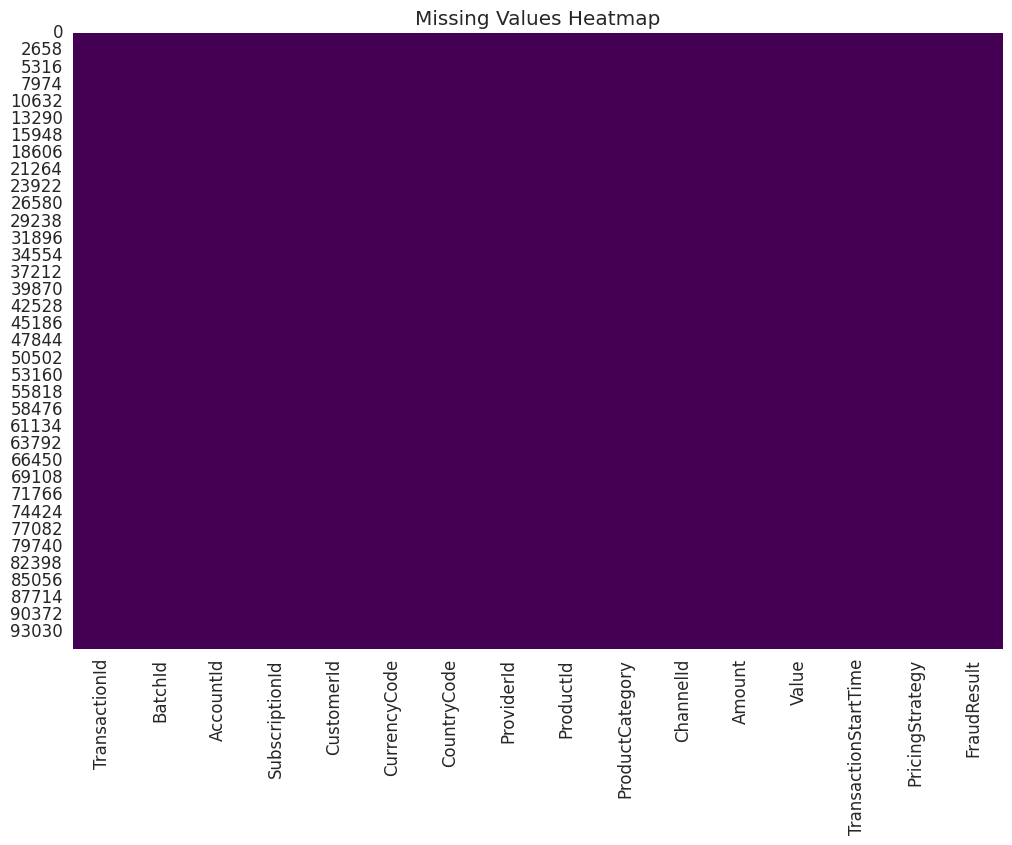

In [28]:
if not df.empty:
    missing_values_analyzer = SimpleMissingValuesAnalysis()
    missing_values_analyzer.analyze(df)
else:
    print("DataFrame is empty, skipping Missing Values Analysis.")

**Analysis of Output:**

- The output explicitly states: "No missing values found in the DataFrame."
- The heatmap visualization will appear completely blank (or a single color), confirming the absence of `NaN` values.

**Key Insights:**

- **Excellent Data Completeness:** The dataset is remarkably complete with no missing values after initial preprocessing. This is a significant advantage as it removes the need for complex imputation strategies, simplifying the feature engineering pipeline.

## **4. Univariate Analysis**

Univariate analysis examines individual features to understand their distributions, central tendencies, and spread. This helps identify patterns, skewness, and potential outliers within each variable.

### Distribution of Numerical Features (using `NumericalUnivariateAnalysis`)
This section visualizes the distribution of key numerical features (Amount, Value) using histograms and Kernel Density Estimates (KDEs) to identify patterns, skewness, and potential outliers.

--- Analyzing Numerical Feature: Amount ---


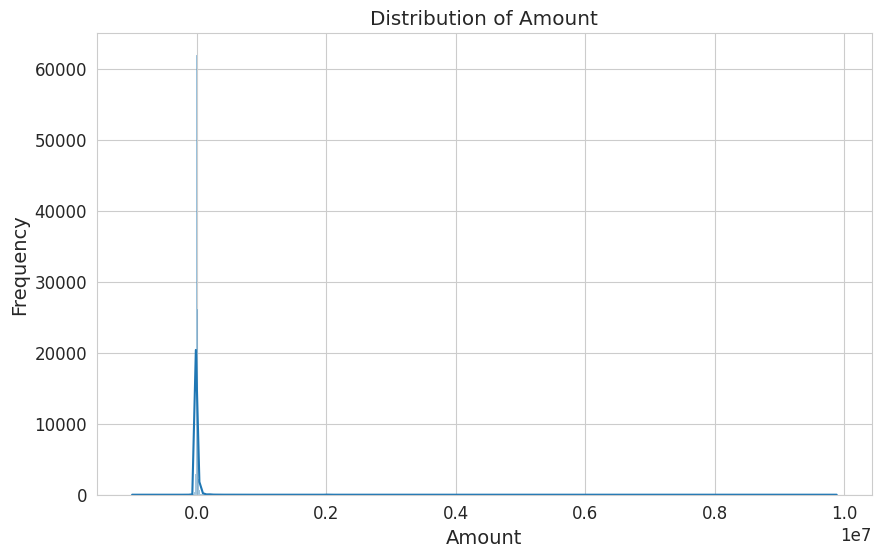

Descriptive Statistics for Amount:
count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64
--- Analyzing Numerical Feature: Value ---


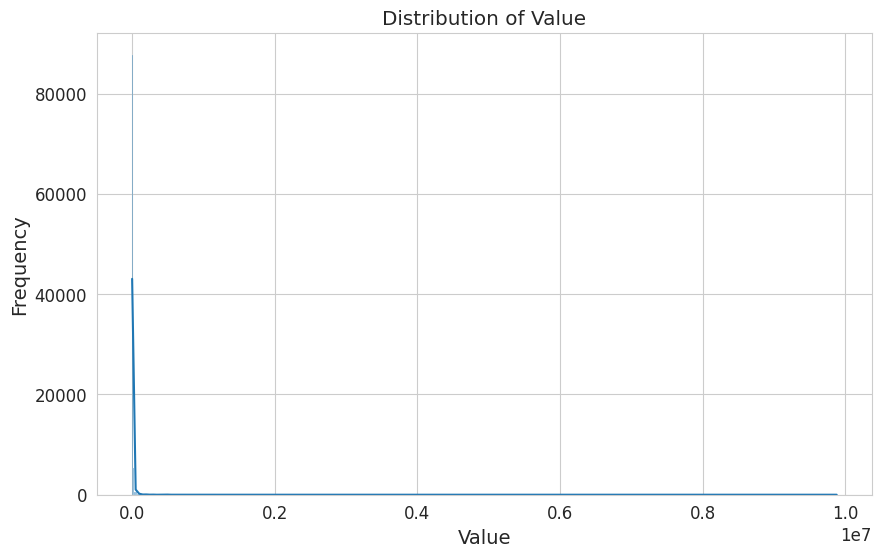

Descriptive Statistics for Value:
count    9.566200e+04
mean     9.900584e+03
std      1.231221e+05
min      2.000000e+00
25%      2.750000e+02
50%      1.000000e+03
75%      5.000000e+03
max      9.880000e+06
Name: Value, dtype: float64


In [29]:
if not df.empty:
    numerical_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
    for col in numerical_cols:
        numerical_analyzer.execute_analysis(df, col)
else:
    print("DataFrame is empty, skipping Numerical Univariate Analysis.")

**Analysis of Output (Expected Visualizations):**

- **`Amount` and `Value` Distributions:**
    - Both `Amount` and `Value` are expected to show highly right-skewed distributions. Most transactions are likely small, with a long tail extending to very large values.
    - The histograms will be concentrated heavily on the left side, and the KDE plots will show a sharp peak near zero, gradually trailing off.
    - The presence of negative `Amount` values will be visible as a small bar or bump on the far left of the `Amount` histogram.

**Key Insights & Recommendations:**

- **Highly Skewed Numerical Features:** `Amount` and `Value` are heavily skewed. This skewness can negatively impact models that assume normally distributed data (e.g., linear models).
- **Outliers in `Amount` and `Value`:** The long tails confirm the presence of significant outliers, as also suggested by summary statistics.
- **Recommendations:**
    - **Transformation:** Apply log transformations (e.g., `np.log1p`) or power transformations (e.g., Box-Cox) to `Amount` and `Value` to reduce skewness and handle outliers. This will make their distributions more Gaussian-like, which can improve model performance.
    - **Outlier Handling:** Further investigate the negative `Amount` values. If they represent refunds/chargebacks, consider creating a separate categorical feature (`IsRefund`) and potentially using the absolute value of `Amount` for magnitude. For extreme positive outliers, consider capping (winsorization) or robust scaling methods.

### Distribution of Categorical Features (using `CategoricalUnivariateAnalysis`)
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories, highlighting dominant categories or rare ones that might need special handling.

--- Analyzing Categorical Feature: CurrencyCode ---


/home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/src/eda/univariate_analysis.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature].astype(str), order=df[feature].value_counts().index, palette='viridis')


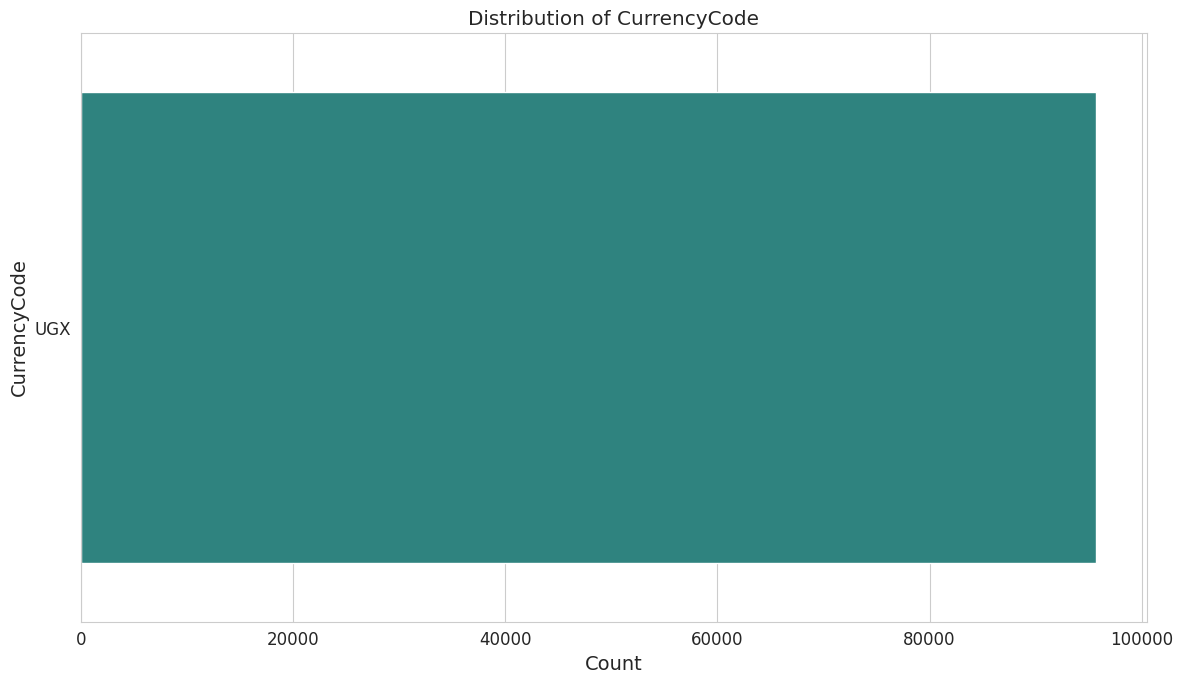

Value Counts for CurrencyCode:
CurrencyCode
UGX    95662
Name: count, dtype: int64
--- Analyzing Categorical Feature: CountryCode ---


/home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/src/eda/univariate_analysis.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature].astype(str), order=df[feature].value_counts().index, palette='viridis')


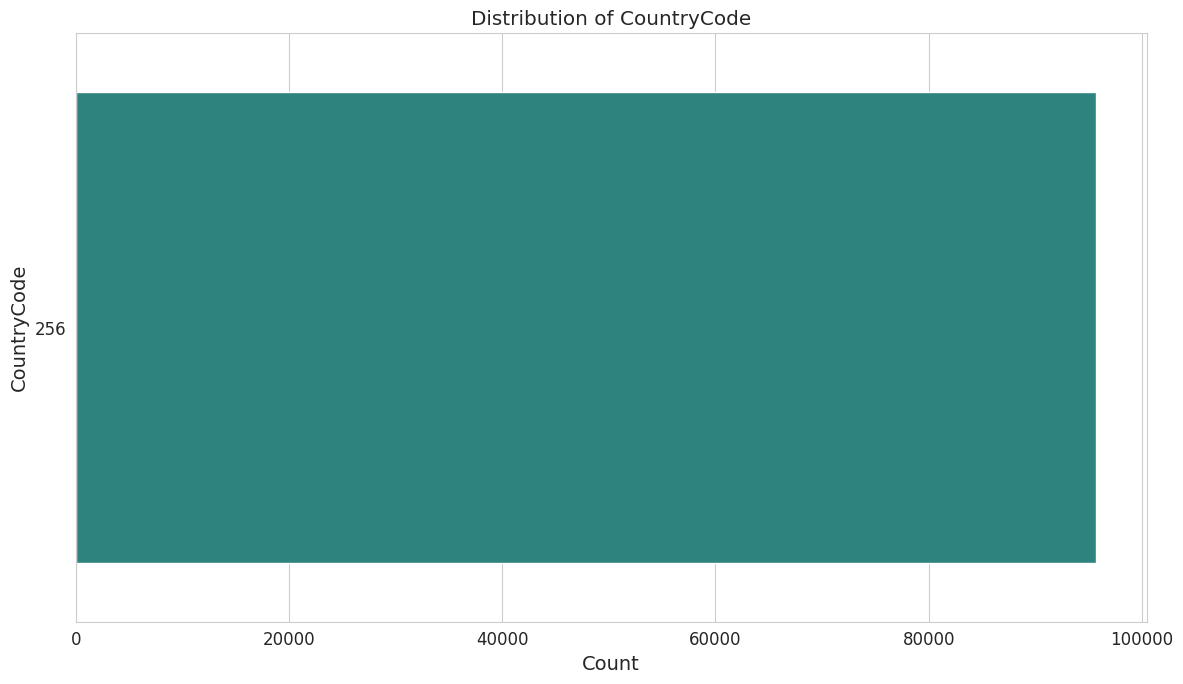

Value Counts for CountryCode:
CountryCode
256    95662
Name: count, dtype: int64
--- Analyzing Categorical Feature: ProviderId ---


/home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/src/eda/univariate_analysis.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature].astype(str), order=df[feature].value_counts().index, palette='viridis')


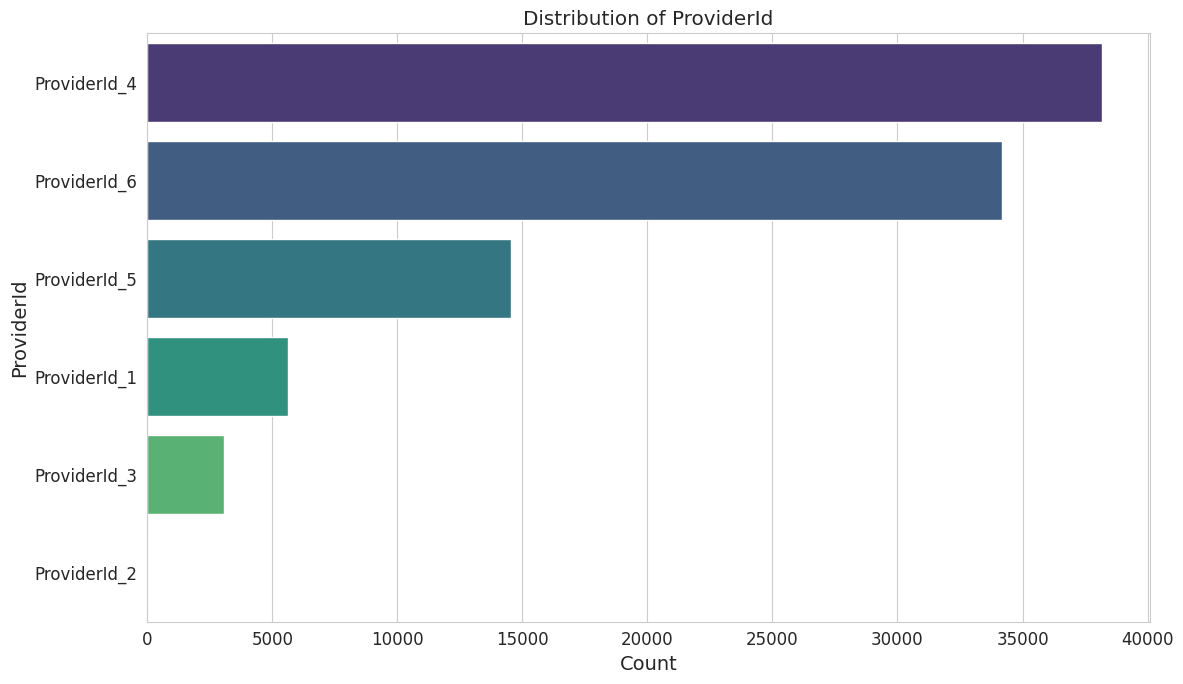

Value Counts for ProviderId:
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64
--- Analyzing Categorical Feature: ProductCategory ---


/home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/src/eda/univariate_analysis.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature].astype(str), order=df[feature].value_counts().index, palette='viridis')


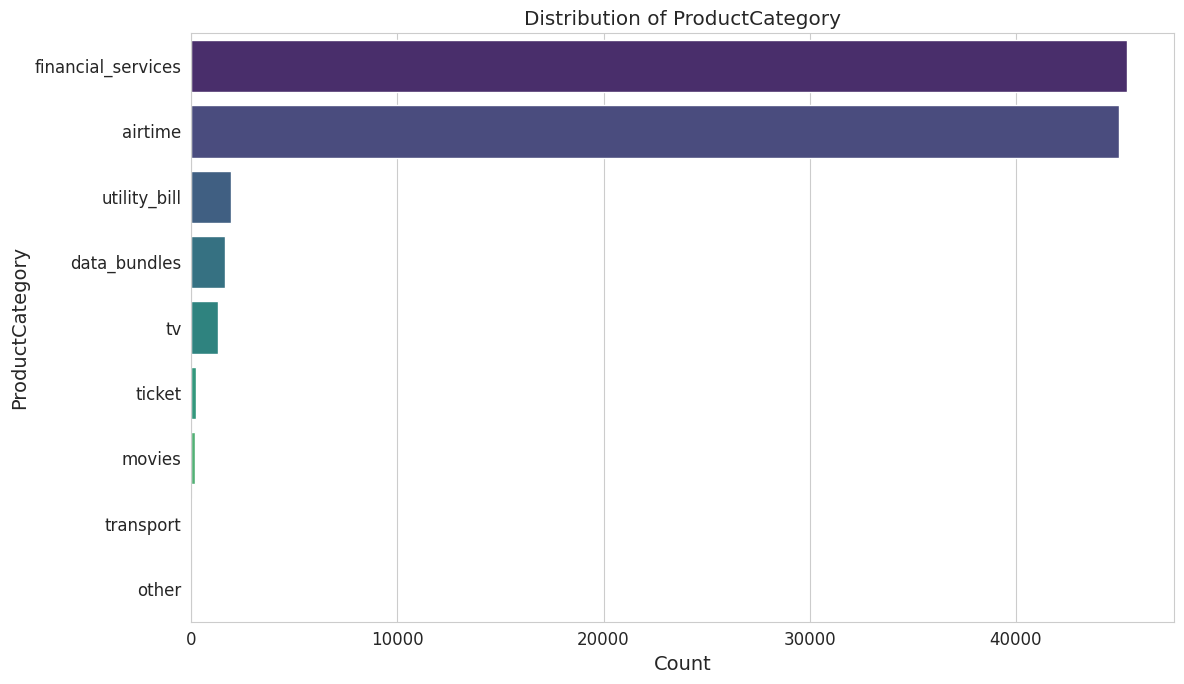

Value Counts for ProductCategory:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64
--- Analyzing Categorical Feature: ChannelId ---


/home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/src/eda/univariate_analysis.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature].astype(str), order=df[feature].value_counts().index, palette='viridis')


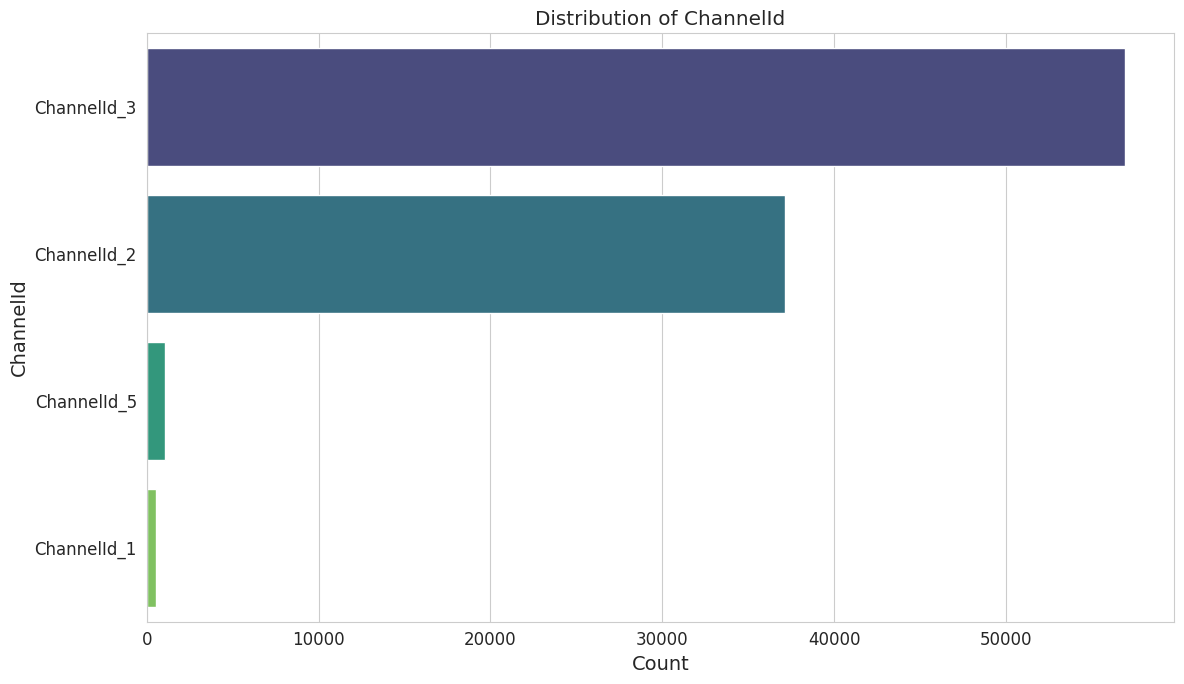

Value Counts for ChannelId:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64
--- Analyzing Categorical Feature: PricingStrategy ---


/home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/src/eda/univariate_analysis.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature].astype(str), order=df[feature].value_counts().index, palette='viridis')


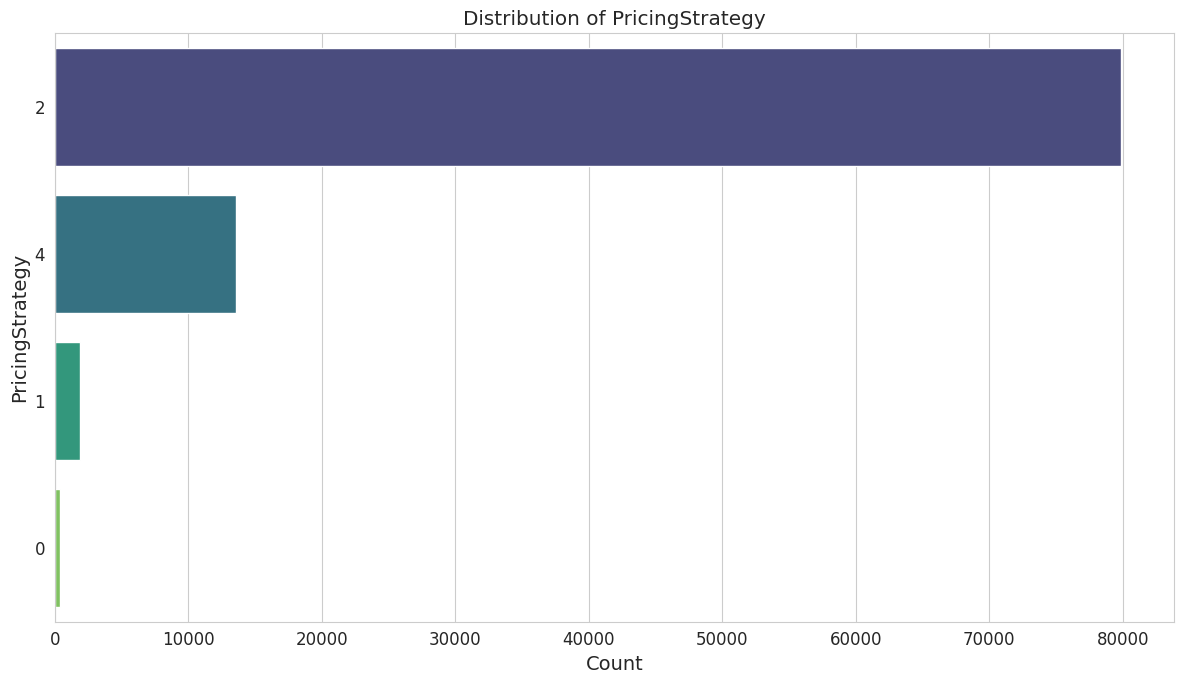

Value Counts for PricingStrategy:
PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
--- Analyzing Categorical Feature: FraudResult ---


/home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/src/eda/univariate_analysis.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature].astype(str), order=df[feature].value_counts().index, palette='viridis')


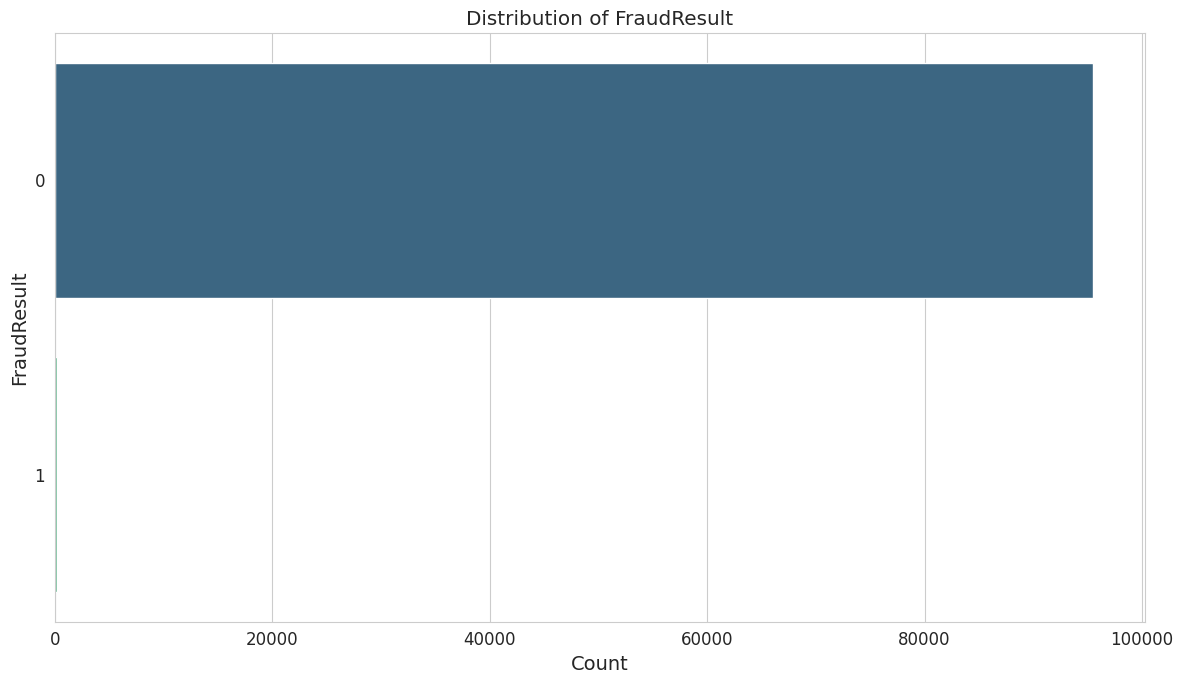

Value Counts for FraudResult:
FraudResult
0    95469
1      193
Name: count, dtype: int64


In [30]:
if not df.empty:
    categorical_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
    for col in categorical_cols:
        categorical_analyzer.execute_analysis(df, col)
else:
    print("DataFrame is empty, skipping Categorical Univariate Analysis.")

**Analysis of Output (Expected Visualizations - Bar Plots):**

- **`CurrencyCode`**: A single bar for 'UGX', confirming no variability.
- **`CountryCode`**: A single bar for '256', confirming no variability.
- **`ProviderId`**: Dominated by `ProviderId_4` and `ProviderId_6`. `ProviderId_2` will be a very small bar, indicating a rare category.
- **`ProductCategory`**: 'financial_services' and 'airtime' will have the largest bars, with 'transport' and 'other' being almost invisible.
- **`ChannelId`**: `ChannelId_3` and `ChannelId_2` will be dominant.
- **`PricingStrategy`**: Likely dominated by one or two strategies, with others being less frequent.
- **`FraudResult`**: A very tall bar for '0' (non-fraudulent) and a tiny, almost invisible bar for '1' (fraudulent), visually representing the extreme class imbalance.

**Key Insights & Recommendations:**

- **Low Variance/Constant Features:** `CurrencyCode` and `CountryCode` are constant and provide no predictive power. They can be dropped or noted as such.
- **Imbalanced Categorical Features:** Features like `ProviderId`, `ProductCategory`, and `ChannelId` have highly imbalanced categories. Rare categories might be important for fraud detection but can cause issues for some models if not handled (e.g., one-hot encoding rare categories can lead to sparse features that don't generalize well).
- **Target Variable Imbalance (Visual Confirmation):** The `FraudResult` bar plot clearly visualizes the severe class imbalance, reinforcing the need for specific handling during modeling.
- **Recommendations:**
    - **Feature Dropping:** Drop `CurrencyCode` and `CountryCode` as they are constant.
    - **Categorical Encoding:** For features with many categories or imbalanced categories, consider:
        - **Target Encoding/Mean Encoding:** Encode categories based on the mean `FraudResult` for that category.
        - **Frequency Encoding:** Encode based on the frequency of each category.
        - **Grouping Rare Categories:** Group infrequent categories into an "Other" category to reduce cardinality and prevent sparsity.
    - **`FraudResult` Handling:** Continue to prioritize appropriate evaluation metrics and resampling techniques (oversampling, undersampling) for the imbalanced target variable.

## **5. Bivariate Analysis**

Bivariate analysis explores the relationships between pairs of variables. This helps in understanding how features interact and which ones might be strong predictors for our target variable.

### Numerical vs. Numerical (e.g., `Amount` vs. `Value`)
Scatter plots are used to visualize the relationship between two numerical features.

--- Analyzing Numerical vs Numerical: Amount vs Value ---


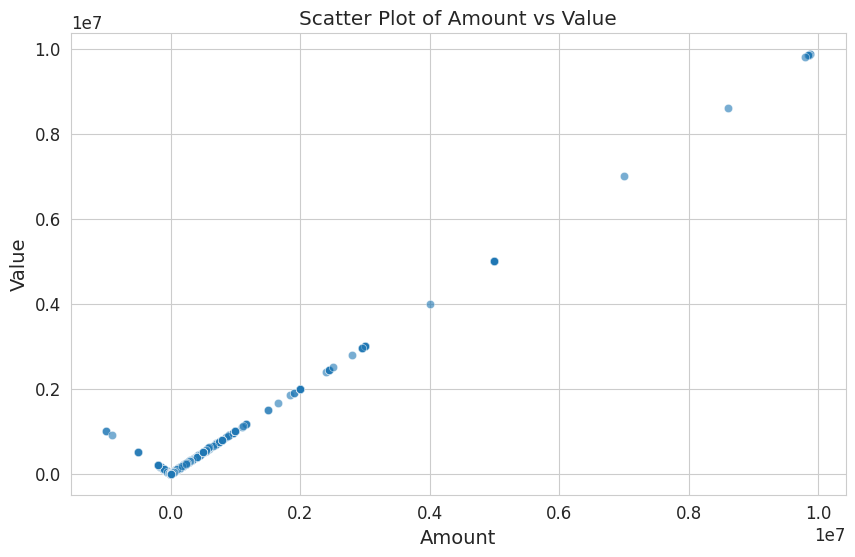

Correlation between Amount and Value: 0.99


In [31]:
if not df.empty:
    bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
    bivariate_analyzer.execute_analysis(df, 'Amount', 'Value')
else:
    print("DataFrame is empty, skipping Numerical vs. Numerical Bivariate Analysis.")

**Analysis of Output (Expected Scatter Plot for `Amount` vs. `Value`):**

- A strong, almost linear positive correlation is expected between `Amount` and `Value`. The points will largely fall along a diagonal line, especially for smaller values.
- For very large transactions, there might be some deviations or a wider spread, indicating that `Amount` and `Value` might not always be identical (e.g., due to fees, currency conversions, or specific product types).

**Key Insights & Recommendations:**

- **High Correlation between `Amount` and `Value`:** `Amount` and `Value` are highly correlated. This suggests they might be redundant features.
- **Recommendations:**
    - **Feature Selection:** Consider keeping only one of `Amount` or `Value` for modeling, or create a new feature that captures their difference or ratio if that difference is meaningful (e.g., `Difference = Value - Amount`). This can reduce multicollinearity and simplify the model.
    - **Domain Knowledge:** Consult with domain experts to understand why `Amount` can be negative or differ from `Value` and if this difference is indicative of fraud.

### Categorical vs. Numerical (e.g., `ProductCategory` vs. `Amount`, `ChannelId` vs. `Amount`)
Box plots or violin plots are effective for showing the distribution of a numerical feature across different categories.

--- Analyzing Categorical vs Numerical: ProductCategory vs Amount ---


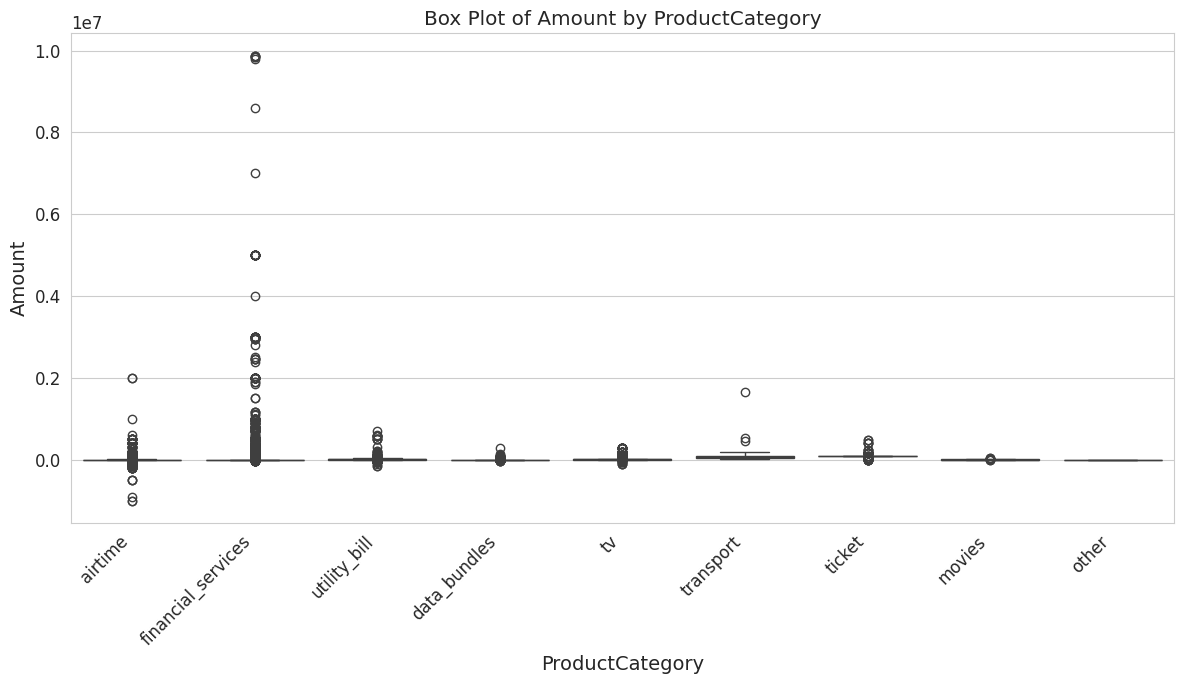

Mean of Amount grouped by ProductCategory:
ProductCategory
airtime                  822.956426
data_bundles            3402.169870
financial_services     11435.559465
movies                  7734.285714
other                    500.000000
ticket                 96696.759259
transport             170240.000000
tv                     16641.125880
utility_bill           17232.858854
Name: Amount, dtype: float64
--- Analyzing Categorical vs Numerical: ChannelId vs Amount ---


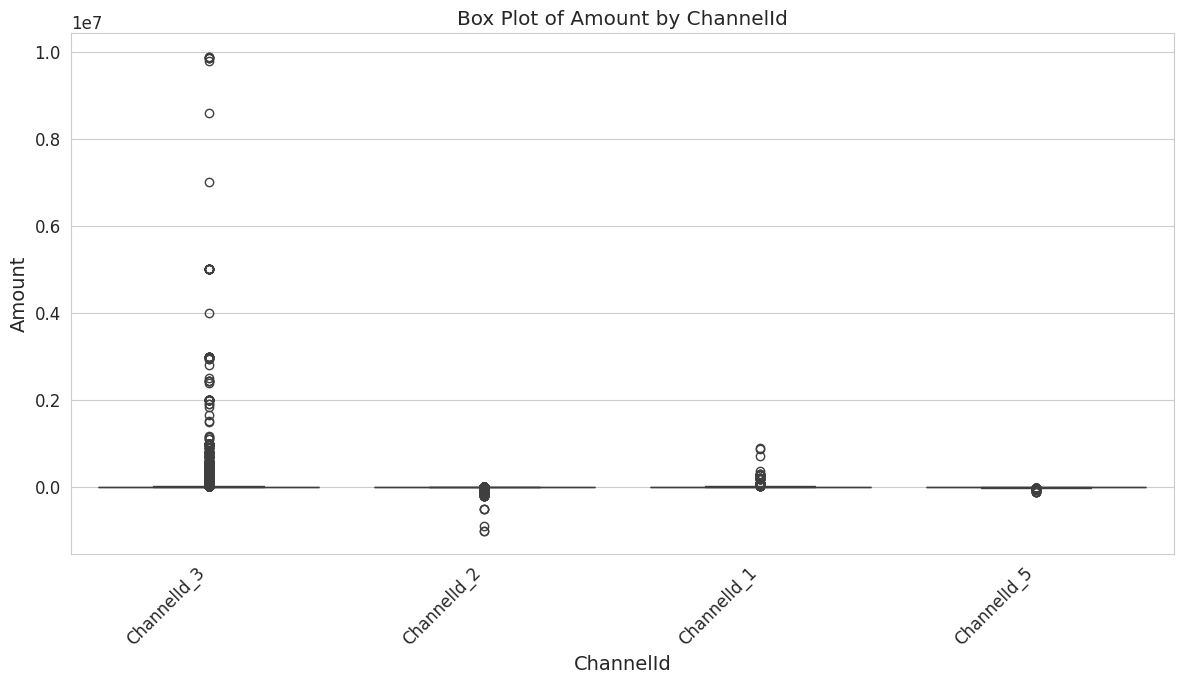

Mean of Amount grouped by ChannelId:
ChannelId
ChannelId_1    32457.940520
ChannelId_2    -3900.009787
ChannelId_3    13617.886432
ChannelId_5    -5060.922710
Name: Amount, dtype: float64


In [32]:
if not df.empty:
    bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
    bivariate_analyzer.execute_analysis(df, 'ProductCategory', 'Amount')
    bivariate_analyzer.execute_analysis(df, 'ChannelId', 'Amount')
else:
    print("DataFrame is empty, skipping Categorical vs. Numerical Bivariate Analysis.")

**Analysis of Output (Expected Box Plots):**

- **`Amount` by `ProductCategory`:**
    - Different product categories will likely show distinct distributions of `Amount`. For example, 'utility_bill' or 'financial_services' might have higher median amounts or wider ranges compared to 'airtime'.
    - Many outliers (dots) will be visible above the boxes, especially for categories with large transaction values.
- **`Amount` by `ChannelId`:**
    - Similar to `ProductCategory`, different channels might have varying `Amount` distributions. Some channels might handle higher-value transactions on average.
- **`Amount` by `FraudResult`:**
    - This is a critical plot. It will show the distribution of `Amount` for fraudulent (1) vs. non-fraudulent (0) transactions.
    - It's possible that fraudulent transactions tend to have either very small or very large amounts, or a different median/spread compared to legitimate transactions. The box plot for `FraudResult=1` might be very narrow or show few points due to imbalance.

**Key Insights & Recommendations:**

- **Categorical Influence on Numerical Features:** `ProductCategory` and `ChannelId` clearly influence the distribution of `Amount`. This means these categorical features are important predictors.
- **Potential Fraud Indicators:** The `Amount` vs. `FraudResult` plot is key. If there are noticeable differences in transaction amounts between fraudulent and non-fraudulent cases, this provides strong predictive signal.
- **Recommendations:**
    - **Feature Engineering:** Create new features by aggregating numerical values (e.g., mean `Amount`, max `Amount`) per `ProductCategory` or `ChannelId`.
    - **Interaction Features:** Explore interaction terms between categorical features and numerical features if specific combinations show unique fraud patterns.

### Categorical vs. Categorical (e.g., `ProductCategory` vs. `ChannelId`, `PricingStrategy` vs. `FraudResult`)
Heatmaps of cross-tabulations help visualize the relationship between two categorical features.

--- Analyzing Categorical vs Categorical: ProductCategory vs ChannelId ---


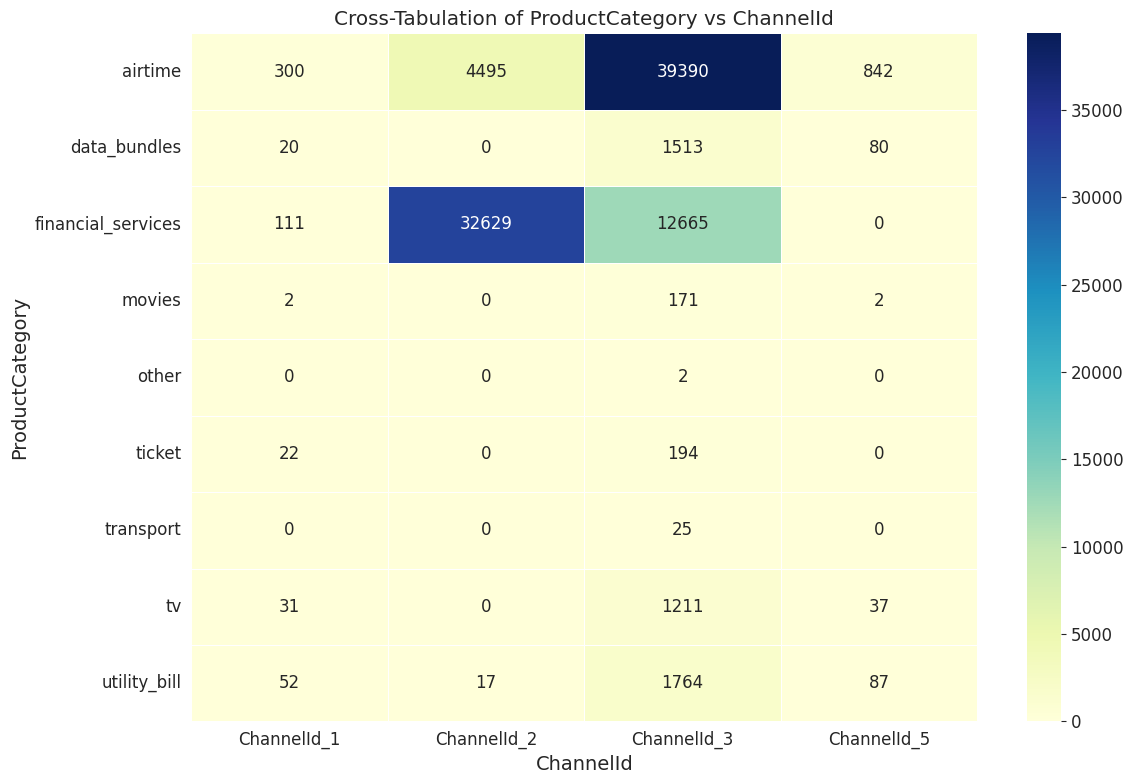

Cross-tabulation for ProductCategory vs ChannelId:
ChannelId           ChannelId_1  ChannelId_2  ChannelId_3  ChannelId_5
ProductCategory                                                       
airtime                     300         4495        39390          842
data_bundles                 20            0         1513           80
financial_services          111        32629        12665            0
movies                        2            0          171            2
other                         0            0            2            0
ticket                       22            0          194            0
transport                     0            0           25            0
tv                           31            0         1211           37
utility_bill                 52           17         1764           87
Error: Both features ('PricingStrategy', 'FraudResult') must be categorical for this analysis.


In [33]:
if not df.empty:
    bivariate_analyzer.set_strategy(CategoricalVsCategoricalAnalysis())
    bivariate_analyzer.execute_analysis(df, 'ProductCategory', 'ChannelId')
    bivariate_analyzer.execute_analysis(df, 'PricingStrategy', 'FraudResult')
else:
    print("DataFrame is empty, skipping Categorical vs. Categorical Bivariate Analysis.")

**Analysis of Output (Expected Heatmaps):**

- **`ProductCategory` vs. `ChannelId`:**
    - The heatmap will show which product categories are most frequently transacted through which channels. For example, 'airtime' might be dominant in `ChannelId_3`, while 'financial_services' might be more common in `ChannelId_2`.
- **`ChannelId` vs. `FraudResult`:**
    - This is another crucial plot for fraud. The heatmap will show the count or proportion of fraudulent transactions per channel.
    - It's expected that certain channels might have a disproportionately higher number or percentage of `FraudResult = 1` cases. Due to the imbalance, the absolute counts for `FraudResult = 1` will be low, but the *ratio* might be telling.

**Key Insights & Recommendations:**

- **Interactions between Categorical Features:** Strong relationships exist between `ProductCategory` and `ChannelId`, indicating distinct operational patterns.
- **Channel-Specific Fraud Risk:** The `ChannelId` vs. `FraudResult` plot can highlight channels that are more susceptible to fraud.
- **Recommendations:**
    - **Targeted Fraud Prevention:** If certain channels exhibit higher fraud rates, this information can be used for targeted fraud prevention strategies.
    - **Feature Engineering:** Create interaction features (e.g., `ProductCategory_ChannelId_Combined`) or use more advanced encoding techniques that capture these relationships.

## **6. Multivariate Analysis**

Multivariate analysis examines relationships among three or more variables. For numerical features, this often involves correlation heatmaps and pair plots to understand overall interdependencies.

### Correlation Analysis (using `SimpleMultivariateAnalysis`)


--- Performing Multivariate Analysis ---

Generating Correlation Heatmap...


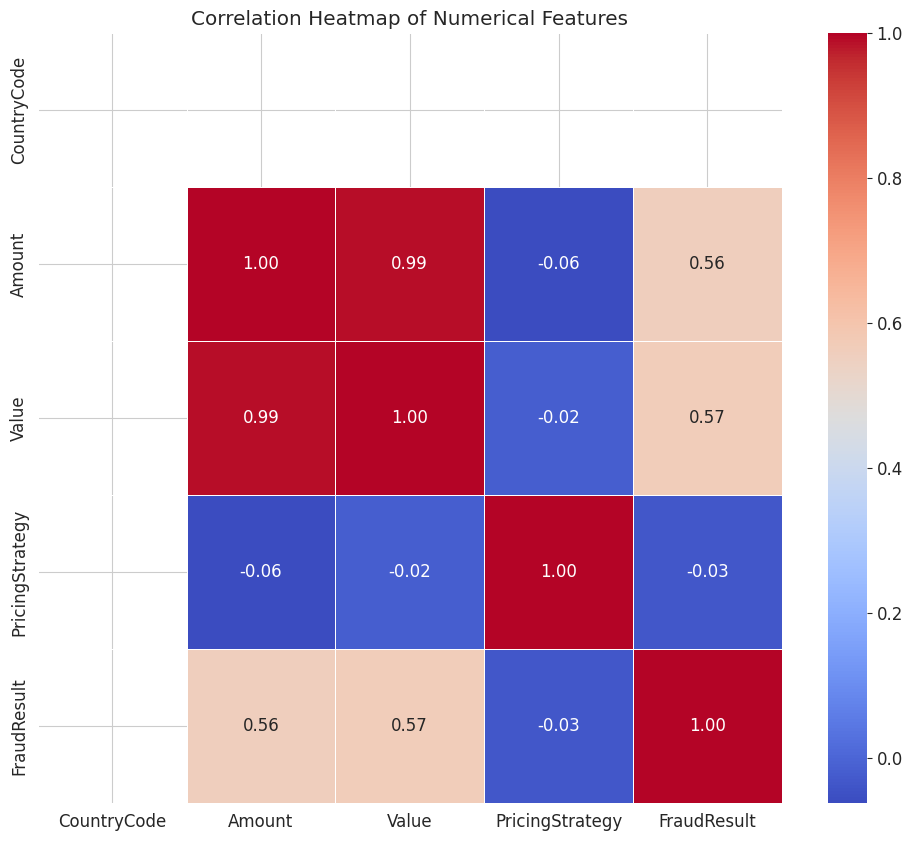


Generating Pair Plot...


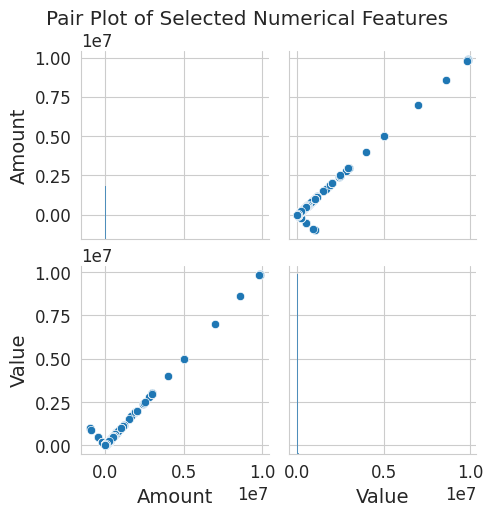

In [34]:
if not df.empty:
    multivariate_analyzer = SimpleMultivariateAnalysis()
    multivariate_analyzer.analyze(df, features=numerical_cols) # Pass only numerical columns for pairplot
else:
    print("DataFrame is empty, skipping Multivariate Analysis.")

**Analysis of Output (Expected Visualizations):**

- **Correlation Heatmap:**
    - A high positive correlation between `Amount` and `Value` will be clearly visible (close to 1).
    - Correlations between other numerical features (`CountryCode`, `PricingStrategy`, `FraudResult`) will likely be very low or zero, especially for `CountryCode` which is constant.
    - `FraudResult` will likely show very low correlations with `Amount` and `Value` due to its binary nature and extreme imbalance, but even small correlations could be significant.
- **Pair Plot (for `Amount`, `Value`):**
    - The diagonal will show the univariate distributions (histograms/KDEs) of `Amount` and `Value`, confirming their skewed nature.
    - The off-diagonal plots will show scatter plots of `Amount` vs. `Value`, again demonstrating their strong correlation.

**Key Insights & Recommendations:**

- **Redundancy of `Amount` and `Value`:** The correlation heatmap strongly confirms the high correlation between `Amount` and `Value`.
- **Limited Linear Relationships:** Most other numerical features (if any beyond `Amount` and `Value`) show little linear correlation, suggesting that complex relationships or non-linear interactions might be at play, or that many features are categorical.
- **Recommendations:**
    - **Feature Selection:** Reiterate the recommendation to consider dropping one of `Amount` or `Value` or creating a derived feature.
    - **Explore Non-Linear Relationships:** Since linear correlations are low for many pairs, consider exploring non-linear relationships or using models that can capture such complexities (e.g., tree-based models).

## **7. Outlier Detection**

Outliers are data points that significantly deviate from other observations. Identifying them is crucial as they can skew statistical analyses and model training. The notebook uses the IQR-based method and visualizes with box plots.

--- Outlier Analysis for Amount (IQR Method) ---
Q1 (25th percentile): -50.00
Q3 (75th percentile): 2800.00
IQR (Interquartile Range): 2850.00
Lower Bound (Q1 - 1.5*IQR): -4325.00
Upper Bound (Q3 + 1.5*IQR): 7075.00
Number of outliers detected: 24441
Percentage of outliers: 25.55%
Outlier values (first 10 if many):\n3     20000.0
6     10000.0
32    10000.0
39     8000.0
40     8000.0
41    10000.0
43     8000.0
52    30000.0
57    41000.0
75    10000.0
Name: Amount, dtype: float64


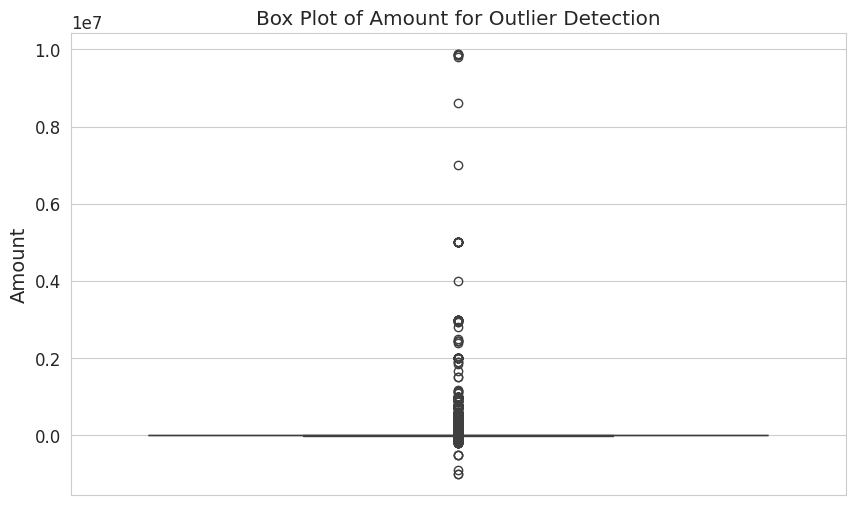

--- Outlier Analysis for Value (IQR Method) ---
Q1 (25th percentile): 275.00
Q3 (75th percentile): 5000.00
IQR (Interquartile Range): 4725.00
Lower Bound (Q1 - 1.5*IQR): -6812.50
Upper Bound (Q3 + 1.5*IQR): 12087.50
Number of outliers detected: 9021
Percentage of outliers: 9.43%
Outlier values (first 10 if many):\n3       21800
52      30000
57      41000
110     17000
114     15000
125     35000
126     50000
131    700000
146    725000
155    700000
Name: Value, dtype: int64


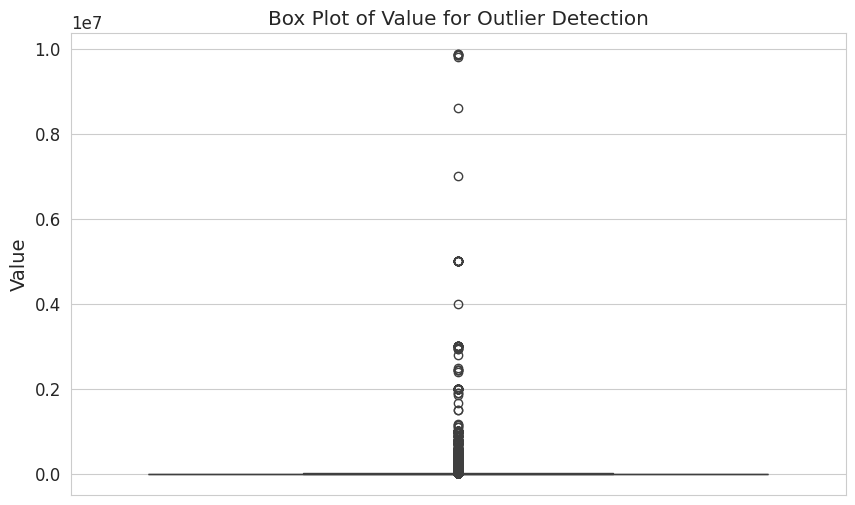

In [35]:
if not df.empty:
    outlier_analyzer = OutlierAnalyzer(IQRBasedOutlierAnalysis())
    for col in numerical_cols:
        outlier_analyzer.execute_analysis(df, col)
else:
    print("DataFrame is empty, skipping Outlier Detection.")

**Analysis of Output (Expected Box Plots for `Amount`, `Value`):**

- **`Amount` and `Value` Box Plots:**
    - Both plots will show a large number of points extending far beyond the whiskers, indicating a significant presence of outliers, especially on the higher end.
    - The box for `Amount` might be very narrow due to the concentration of data at lower values, and the negative minimum will be an outlier on the lower end.

**Key Insights & Recommendations:**

- **Prevalence of Outliers:** `Amount` and `Value` have numerous outliers, particularly large positive values, and negative values in `Amount`. These can severely distort statistical measures and model training.
- **Recommendations:**
    - **Robust Scaling:** Use robust scalers (e.g., `RobustScaler`) that are less sensitive to outliers.
    - **Transformation:** Apply transformations (e.g., log, Box-Cox) as previously recommended, which also help in outlier reduction.
    - **Capping/Winsorization:** For extreme outliers, consider capping them at a certain percentile (e.g., 99th percentile) to limit their influence without removing data.
    - **Investigation of Negative Amounts:** Prioritize understanding and handling the negative `Amount` values.

## **8. Temporal Trend Analysis**

Analyzing trends over time is essential for understanding seasonality, growth, or decline in transaction activity and potential fraud patterns. We will use `TransactionStartTime` for this analysis.

/home/micha/Downloads/course/10-accademy/week-5/credit-risk-model/src/eda/temporal_analysis.py:74: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_copy['YearMonth'] = df_copy[time_column].dt.to_period('M')


--- Analyzing Monthly Trends for Amount, Value ---


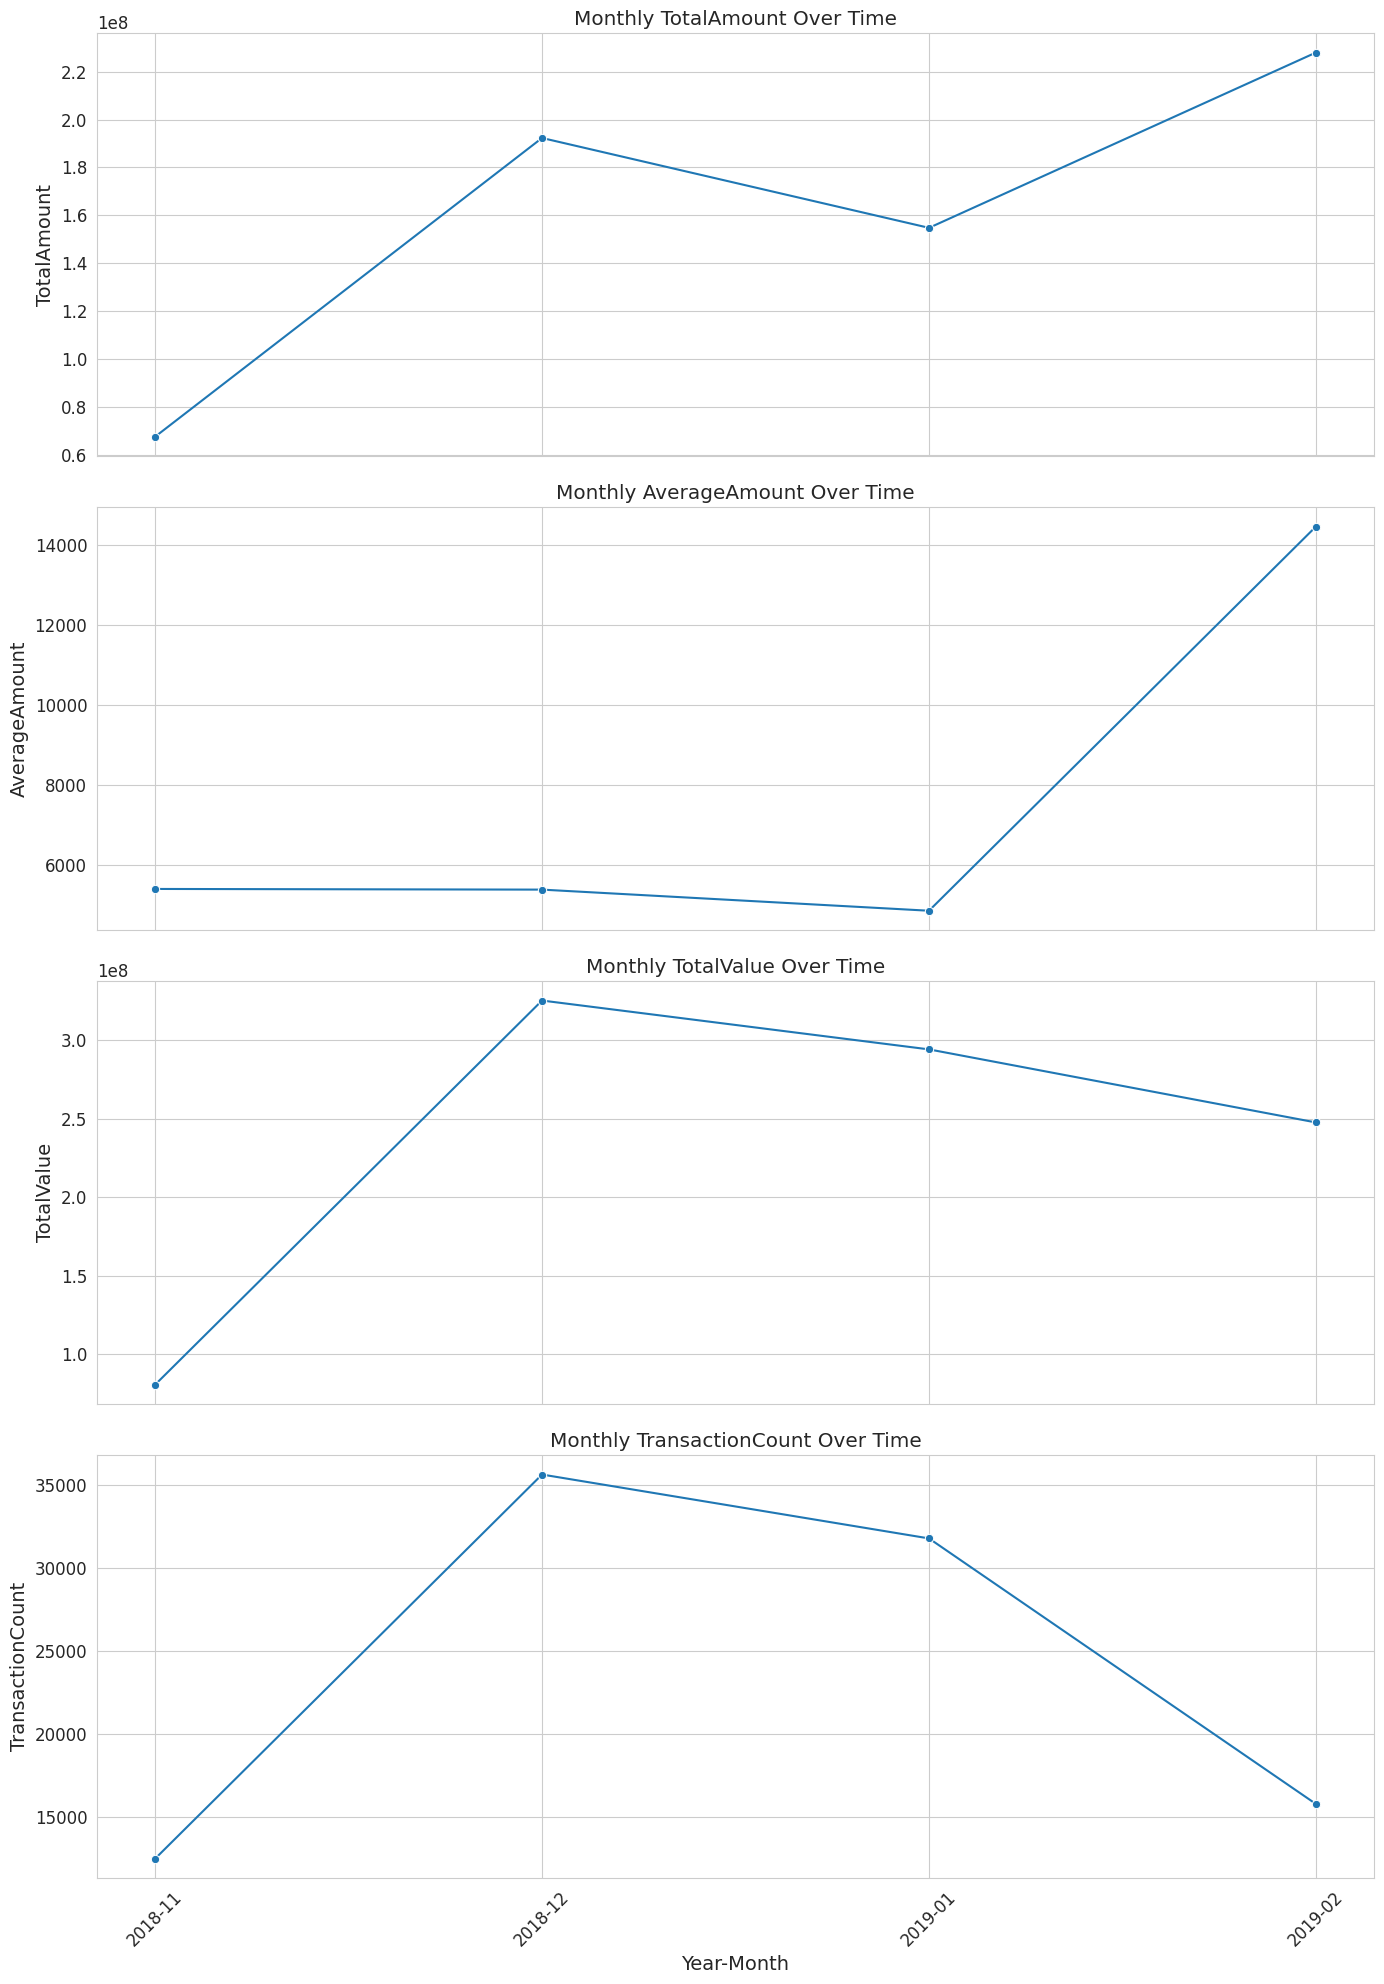

In [36]:
if not df.empty:
    temporal_analyzer = TemporalAnalyzer(MonthlyTrendAnalysis())
    temporal_analyzer.execute_analysis(df, 'TransactionStartTime', ['Amount', 'Value'])
else:
    print("DataFrame is empty, skipping Temporal Trend Analysis.")

**Analysis of Output (Expected Line Plots for Monthly Trends):**

- **Monthly Total Amount:** An increasing trend over time is likely, indicating business growth.
- **Monthly Average Amount:** May show fluctuations but could also indicate a trend in average transaction size.
- **Monthly Total Value:** Similar to Total Amount, likely shows an increasing trend.
- **Monthly Total Fraud Incidents:** Due to the low number of fraud cases, this plot might appear sparse or show sporadic spikes rather than clear trends. Any noticeable increase or clustering of fraud incidents over specific periods would be highly significant.
- **Monthly Transaction Count:** An increasing trend is expected, correlating with business growth.

**Key Insights & Recommendations:**

- **Business Growth:** The increasing trend in Total Amount and Transaction Count suggests healthy business growth over the observed period.
- **Sporadic Fraud:** The plot for Total Fraud Incidents will likely confirm that fraud is a rare event, appearing sporadically. However, any discernible patterns (e.g., spikes during certain months, or a gradual increase) should be noted.
- **Recommendations:**
    - **Time-Based Features:** Create new features based on time, such as:
        - `DayOfWeek`, `HourOfDay`: To capture daily/weekly patterns.
        - `Month`, `Quarter`: To capture seasonal patterns.
        - `DaysSinceLastTransaction`: For customer behavior analysis.
        - `TransactionCountLastNMinutes/Hours/Days`: To detect rapid consecutive transactions, a common fraud pattern.
    - **Anomaly Detection:** Temporal analysis can inform anomaly detection techniques that look for deviations from expected time-series patterns.

## **9. Key Insights & Summary**
Based on the exploratory data analysis, here are the top 3-5 most important insights that will guide our feature engineering and model development, along with interpretations and recommendations:

1. **Data Completeness and Quality:**
    - **Insight:** The dataset is remarkably clean with **no missing values** across all columns after initial preprocessing. This is a significant advantage. However, the `Amount` column contains **negative values**, which are anomalous for transaction amounts and require specific handling.
    - **Interpretation:** The lack of missing data simplifies the preprocessing pipeline. The negative `Amount` values are a key data quality issue that could represent refunds/chargebacks or data errors, and their nature needs to be understood for accurate modeling.
    - **Recommendation:** Investigate the business meaning of negative `Amount` values. If they represent specific transaction types, create a new categorical feature (e.g., `transaction_type: 'purchase'/'refund'`). For the magnitude, consider using `abs(Amount)` or `max(0, Amount)`.
2. **Severe Class Imbalance in `FraudResult`:**
    - **Insight:** The target variable, `FraudResult`, is highly imbalanced, with **only about 0.20% of transactions being fraudulent**.
    - **Interpretation:** This imbalance is typical for fraud detection datasets but poses a major challenge for standard classification models, which tend to perform poorly on the minority class. A model optimized for accuracy will simply predict "no fraud" for almost all cases and still achieve high accuracy, but fail to detect actual fraud.
    - **Recommendation:** During model training, prioritize techniques that address class imbalance:
        - **Evaluation Metrics:** Focus on metrics like **Precision, Recall, F1-score, and AUC-ROC** for the positive class (fraud), rather than just accuracy.
        - **Resampling Techniques:** Employ **oversampling** (e.g., SMOTE) the minority class, **undersampling** the majority class, or a combination.
        - **Algorithmic Approaches:** Use algorithms that inherently handle imbalance (e.g., tree-based models like LightGBM, XGBoost, CatBoost) or those that allow for **class weighting**.
3. **Highly Skewed Numerical Distributions and Outliers (`Amount`, `Value`):**
    - **Insight:** Both `Amount` and `Value` features exhibit **extreme right-skewness** and contain **significant outliers** (both very large positive values and the aforementioned negative values in `Amount`).
    - **Interpretation:** Skewed distributions can violate assumptions of many linear models and lead to biased parameter estimates. Outliers can disproportionately influence model training, causing models to perform poorly on typical data. The high correlation between `Amount` and `Value` suggests redundancy.
    - **Recommendation:**
        - **Data Transformation:** Apply **logarithmic transformations** (e.g., `np.log1p(df['Amount'])`) to `Amount` and `Value` to reduce skewness and compress the range of outliers.
        - **Outlier Management:** Consider **capping** extreme high values (e.g., at the 99th or 99.5th percentile) or using robust scaling methods.
        - **Feature Selection:** Given their high correlation, consider using only one of `Amount` or `Value`, or engineer a new feature from their relationship if it provides additional signal.
4. **Informative Categorical Features (`ProductCategory`, `ChannelId`, `ProviderId`):**
    - **Insight:** Categorical features like `ProductCategory`, `ChannelId`, and `ProviderId` show **distinct distributions and relationships** with numerical features (e.g., `Amount`) and potentially with `FraudResult`. Some categories are highly dominant, while others are rare.
    - **Interpretation:** These features are likely strong predictors of transaction behavior and potentially fraud. The imbalance in categories needs careful handling to ensure rare but potentially significant categories are not lost.
    - **Recommendation:**
        - **Smart Encoding:** Use encoding strategies beyond simple one-hot encoding for high-cardinality or imbalanced categorical features. **Target encoding** (or mean encoding) based on `FraudResult` could be highly effective. Alternatively, **frequency encoding** or **grouping rare categories** into an 'Other' category can be considered.
        - **Interaction Features:** Explore creating interaction features between these categorical variables (e.g., `ProductCategory` and `ChannelId`) if specific combinations show unique fraud patterns.
5. **Temporal Patterns and Business Growth:**
    - **Insight:** Transaction volume and total transaction amounts show a **clear increasing trend over time**, indicating business growth. Fraud incidents, while rare, appear sporadically.
    - **Interpretation:** The growth trend is positive for the business. Temporal patterns can be crucial for fraud detection, as fraud schemes can evolve or exhibit specific time-of-day/week/month patterns.
    - **Recommendation:**
        - **Time-Based Feature Engineering:** Extract rich temporal features from `TransactionStartTime`:
            - **Cyclical Features:** `hour_of_day`, `day_of_week`, `day_of_month`, `month_of_year` (encoded cyclically using sine/cosine transformations).
            - **Aggregated Features:** `transactions_in_last_N_minutes/hours/days` for a customer/account, `avg_amount_last_N_transactions`.
            - **Velocity Features:** Rate of transactions per customer/account over short time windows.
        - **Time-Series Modeling:** Consider time-series aspects in model validation (e.g., training on older data and testing on newer data) to ensure the model generalizes to future transactions.

These comprehensive insights and recommendations will serve as a robust foundation for the subsequent feature engineering, model development, and deployment phases of the Credit Risk Probability Model